In [3]:
import csv
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

def read_csv(filename):
    with open(filename, newline='') as f:
        reader = csv.DictReader(f)
        for r in reader:
            print(r)

In [4]:
#heart_clean_file = "clean_data/heart_clean.csv"
heart_clean_file = "clean_data/hungarian_clean.csv"
data = pd.read_csv(heart_clean_file)

print(data.head())
print(data.describe())
print(data['restecg'].unique())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   28    1   2     130.0  132.0    0        2    185.0      0      0.0   
1   29    1   2     120.0  243.0    0        0    160.0      0      0.0   
2   29    1   2     140.0  231.2    0        0    170.0      0      0.0   
3   30    0   1     170.0  237.0    0        1    170.0      0      0.0   
4   31    0   2     100.0  219.0    0        1    150.0      0      0.0   

   slope  ca  thal  target  
0      1   1     3       0  
1      1   1     2       0  
2      1   1     3       0  
3      2   0     6       0  
4      1   0     2       0  
              age         sex          cp    trestbps        chol         fbs  \
count  294.000000  294.000000  294.000000  294.000000  294.000000  294.000000   
mean    47.826531    0.724490    2.982993  132.578912  250.135374    0.068027   
std      7.811812    0.447533    0.965117   17.596648   65.134634    0.252222   
min     28.000000    0.000000    1.000000   92.0000

cumulative variances:  [24.75 36.23 46.17 53.93 61.6  68.72 75.43 81.65 87.51 91.44 94.47 97.45
 99.99]
discrete variances:  [24.75 11.48  9.94  7.76  7.67  7.12  6.71  6.22  5.86  3.93  3.03  2.98
  2.54]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


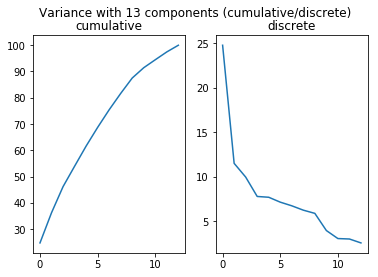

In [6]:

X = data.iloc[:, 0:13].values # data
Y = data.iloc[:, 13].values   # label

scaled_X = scale(X)

def displayVarRatio(pca):
    ratio = pca.explained_variance_ratio_
    var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
    var2 = np.round(pca.explained_variance_ratio_, decimals=4) * 100
    print("cumulative variances: ", var1)
    print("discrete variances: ", var2)
    fig, axs = plt.subplots(1, 2)
    fig.suptitle("Variance with 13 components (cumulative/discrete)")
    axs[0].plot(var1)
    axs[0].set_title("cumulative")
    
    axs[1].plot(var2)
    axs[1].set_title("discrete")
    fig.show()
    

pca = PCA(n_components=13)
pca.fit(scaled_X)
displayVarRatio(pca)
        #plt.waitforbuttonpress()

# 13 components
x_13c = pca.fit_transform(scaled_X)


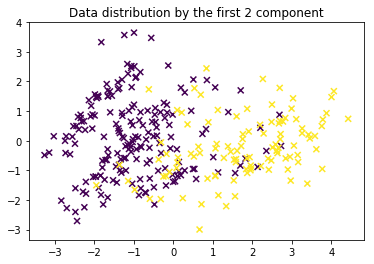

In [8]:
pca2 = PCA(n_components=4)
pca2.fit(scaled_X)
# 4 components
x_4c = pca2.fit_transform(scaled_X)

plt.title("Data distribution by the first 2 component")
plt.scatter(x_4c[:,0], x_4c[:,1], c=Y, marker='x')
plt.show()

In [9]:
l_acc = []
n_acc = []
k_acc = []
r_acc = []

for i in range(2, 14):
    pca = PCA(n_components=i)
    pca.fit(scaled_X)
        #plt.waitforbuttonpress()

# 13 components
    x_c = pca.fit_transform(scaled_X)
    X_train, X_test, y_train, y_test = train_test_split(x_c, Y, test_size=.3, 
                                                        stratify=Y, 
                                                        random_state=42)
    print("=== PCA fitting result: {} components ===".format(i))
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc = accuracy_score(y_test, preds.argmax(axis=1))
    print('Logistic Regression Accuracy: {:.5f}'.format(acc))
    l_acc.append(acc)

    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    preds_n = neigh.predict_proba(X_test)
    acc = accuracy_score(y_test, preds_n.argmax(axis=1))
    print('KNN Accuracy: {:.5f}'.format(acc))
    n_acc.append(acc)

    kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
    preds_k = kmeans.predict(X_test)
    acc = accuracy_score(y_test, preds_k)
    print('KMeans Accuracy: {:.5f}'.format(accuracy_score(y_test, preds_k)))
    k_acc.append(acc)

    ridge = Ridge()
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse_score = np.sqrt(mean_squared_error(y_pred, y_test))
    print('Ridge regression rsme: {:.5f}'.format(rmse_score))
    r_acc.append(rmse_score)

=== PCA fitting result: 2 components ===
Logistic Regression Accuracy: 0.85393
KNN Accuracy: 0.83146
KMeans Accuracy: 0.15730
Ridge regression rsme: 0.33446
=== PCA fitting result: 3 components ===
Logistic Regression Accuracy: 0.85393
KNN Accuracy: 0.83146
KMeans Accuracy: 0.55056
Ridge regression rsme: 0.32351
=== PCA fitting result: 4 components ===
Logistic Regression Accuracy: 0.84270
KNN Accuracy: 0.82022
KMeans Accuracy: 0.13483
Ridge regression rsme: 0.31963
=== PCA fitting result: 5 components ===
Logistic Regression Accuracy: 0.83146
KNN Accuracy: 0.84270
KMeans Accuracy: 0.15730
Ridge regression rsme: 0.32249
=== PCA fitting result: 6 components ===
Logistic Regression Accuracy: 0.84270
KNN Accuracy: 0.85393
KMeans Accuracy: 0.64045
Ridge regression rsme: 0.32259
=== PCA fitting result: 7 components ===
Logistic Regression Accuracy: 0.84270
KNN Accuracy: 0.85393
KMeans Accuracy: 0.64045
Ridge regression rsme: 0.32228
=== PCA fitting result: 8 components ===
Logistic Regressi

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

KMeans Accuracy: 0.07865
Ridge regression rsme: 0.31821
=== PCA fitting result: 9 components ===
Logistic Regression Accuracy: 0.85393
KNN Accuracy: 0.86517
KMeans Accuracy: 0.31461
Ridge regression rsme: 0.32100
=== PCA fitting result: 10 components ===
Logistic Regression Accuracy: 0.86517
KNN Accuracy: 0.86517
KMeans Accuracy: 0.06742
Ridge regression rsme: 0.32007
=== PCA fitting result: 11 components ===
Logistic Regression Accuracy: 0.85393
KNN Accuracy: 0.88764
KMeans Accuracy: 0.31461
Ridge regression rsme: 0.31608
=== PCA fitting result: 12 components ===
Logistic Regression Accuracy: 0.88764
KNN Accuracy: 0.86517
KMeans Accuracy: 0.31461
Ridge regression rsme: 0.31039
=== PCA fitting result: 13 components ===
Logistic Regression Accuracy: 0.87640
KNN Accuracy: 0.86517
KMeans Accuracy: 0.31461
Ridge regression rsme: 0.30717


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Text(0.5, 1.0, 'Ridge')

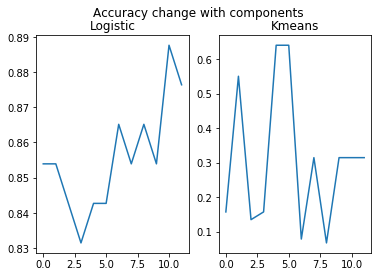

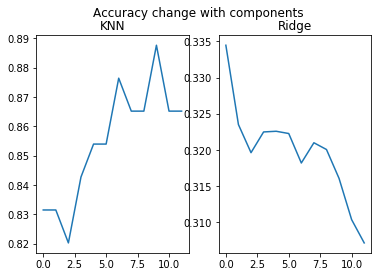

In [10]:
fig, axs = plt.subplots(1, 2)
fig.suptitle("Accuracy change with components")
axs[0].plot(l_acc)
axs[0].set_title("Logistic")

axs[1].plot(k_acc)
axs[1].set_title("Kmeans")
#fig.show()

fig, axs = plt.subplots(1, 2)
fig.suptitle("Accuracy change with components")
axs[0].plot(n_acc)
axs[0].set_title("KNN")

axs[1].plot(r_acc)
axs[1].set_title("Ridge")
#ig.show()


In [11]:
# prediction traning on 13 component
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, 
                                                    stratify=Y, 
                                                    random_state=42)

In [12]:
print("=== PCA fitting result: Original Data ===".format(i))
clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
acc1 = accuracy_score(y_test, preds.argmax(axis=1))
print('Logistic Regression Accuracy: {:.5f}'.format(acc))

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
preds_n = neigh.predict_proba(X_test)
acc2 = accuracy_score(y_test, preds_n.argmax(axis=1))
print('KNN Accuracy: {:.5f}'.format(acc2))

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
preds_k = kmeans.predict(X_test)
acc3 = accuracy_score(y_test, preds_k)
print('KMeans Accuracy: {:.5f}'.format(accuracy_score(y_test, preds_k)))

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse_score = np.sqrt(mean_squared_error(y_pred, y_test))
print('Ridge regression rsme: {:.5f}'.format(rmse_score))

=== PCA fitting result: Original Data ===
Logistic Regression Accuracy: 0.31461
KNN Accuracy: 0.62921
KMeans Accuracy: 0.23596
Ridge regression rsme: 0.30774


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


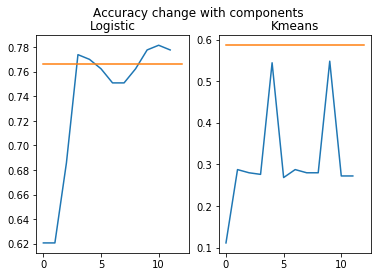

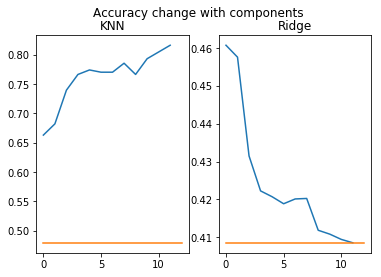

In [246]:
fig, axs = plt.subplots(1, 2)
fig.suptitle("Accuracy change with components")
axs[0].plot(l_acc)
axs[0].set_title("Logistic")

axs[0].plot([acc1] * 13)

axs[1].plot(k_acc)
axs[1].set_title("Kmeans")

axs[1].plot([acc2] * 13)
#fig.show()

fig, axs = plt.subplots(1, 2)
fig.suptitle("Accuracy change with components")
axs[0].plot(n_acc)
axs[0].set_title("KNN")
axs[0].plot([acc3] * 13)

axs[1].plot(r_acc)
axs[1].set_title("Ridge")
axs[1].plot([rmse_score] * 13)
#ig.show()